# Случайные величины
**Случайная величина** (*random variable*) представляет собой переменную, которая в результате испытаний принимает одно из возможных значений, наперед не известное и зависящее от случайных причин, которые заранее не могут быть учтены.

**Дискретная** (*discrete*) случайная величина принимает изолированные значения, в то время как **непрерывная** (*continuous*) случайная величина принимает значения из некоторого непрерывного конечного или бесконечного промежутка.

**Законом распределения дискретной случайной величины** называется соответствие между возможными значениями и из вероятностями.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def normalize(array):
    """ нормализует значения массива, чтобы сумма элементов равнялась 1 """
    return array / array.sum(axis=0)

## Одномерная случайная величина

Сформируем дискретную случайную величину, определив множество возможных значений и вероятности их выпадения в массивах `X` и `p`. Визуализируем **распределение вероятностей** (*Probability Distribution*):

'len(X) = 9, len(p) = 9, sum(p) = 1.0'

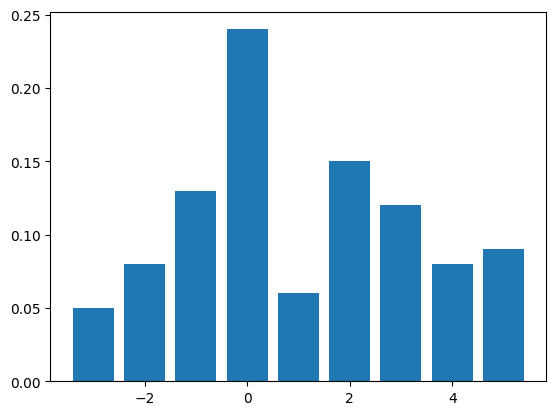

In [15]:
X = np.array([-3, -2, -1, 0, 1, 2, 3, 4, 5])
p = np.array([0.05, 0.08, 0.13, 0.24, 0.06, 0.15, 0.12, 0.08, 0.09])

plt.bar(X, p)
(f"{len(X) = }, {len(p) = }, {sum(p) = }")

Функцию, которая возвращает вероятность того, что дискретная случайная величина $X$ примет определенное значение $n$ называется **функцией вероятности** (*Probability Mass Function* - PMF):

In [38]:
def pmf(n, X, p):
    index = None
    for i in range(len(X)):
        if X[i] == n:
            index = i
            break 
    return 0 if index is None else p[index]

pmf(-1, X, p)

0.13

### Функция распределения

**Функция распределения** (*Cumulative Distribution Function* - CDF) вероятностей случайной величины называется функция $F(x)$, определяющая вероятность того, что случайная величина $X$ в результате испытаний примент значение, меньшее $x$. Функция распределения, очевидно, является монотонной неубывающей функцией.

Определим функцию `cdf()`, которая по заданному `x` возвращает значение функции распределения данной случайной величины.

In [7]:
def cdf(x, X, p):
    probability = 0
    for i in range(len(X)):
        if X[i] < x:
            probability += p[i]
    return probability

cdf(5, X, p)

0.56

values = array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8])
cdf_sequence = array([0.  , 0.  , 0.  , 0.05, 0.13, 0.26, 0.5 , 0.56, 0.71, 0.83, 0.91,
       1.  , 1.  , 1.  ])


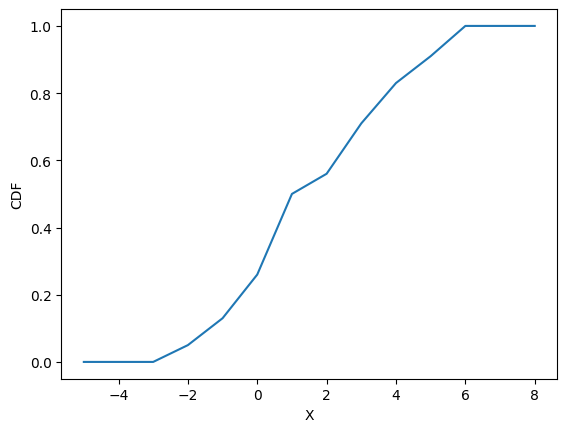

In [16]:
values = np.arange(-5, 9)
cdf_sequence = np.zeros(14)

for i in range(len(values)):
    c = cdf(values[i], X, p)
    cdf_sequence[i] = c

plt.plot(values, cdf_sequence)
plt.xlabel("X")
plt.ylabel("CDF")
print(f"{values = }\n{cdf_sequence = }")

### Плотность вероятности

Когда мы имеем дело с непрерывной случайной величиной, определенной на некотором открытом или закрытом промежуте, то вероятность выпадения конкретного значения является нулевой. Поэтому вместо распределения вероятностей для задания распределения случайной величины используется **плотность вероятности** (*Probability Density Function* - PDF), которая определяет вероятность выпадения значений, лежащих в некотором диапозоне.

Функция распределения $F(x)$ непрерывной случайной величины является непрерывной, кусочно-дифференцируемой функцией. Вероятность $p$ того, что случайная величина примет значение, лежащее на отрезке $[a, b]$, равна приращению функции распределения на этом интервале:
$$
p(a \leq X \leq b) = F(a) - F(b)
$$


Если известна функция распределения F(x), плотность вероятности может быть получена как производная от функции распределения.

Предположим, что функция распределения задана сигмоидой c $\alpha = 0.1$:

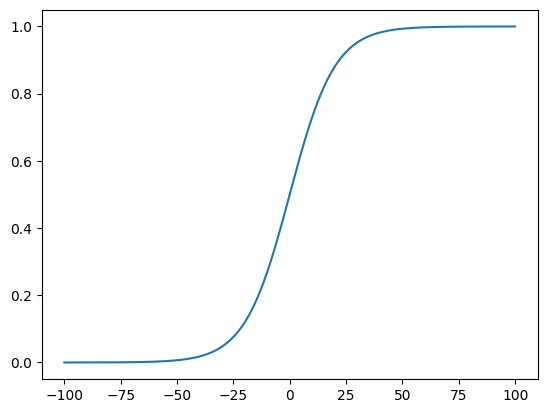

In [13]:
def sigmoid(x, alpha=0.1):
    return 1 / (1 + np.exp(-alpha * x))

segment = np.linspace(-100, 100, 1000)
cdf_sequence = np.zeros_like(segment)

for i in range(len(segment)):
    cdf_sequence[i] = sigmoid(segment[i])

plt.plot(segment, cdf_sequence)

Напишем функцию `deriv_sigmoid`, которая возвращает значение производной сигмоиды в точе `x`. Тогда мы сможем получить значения плотности вероятности на рассматриваемом отрезке `segment`:

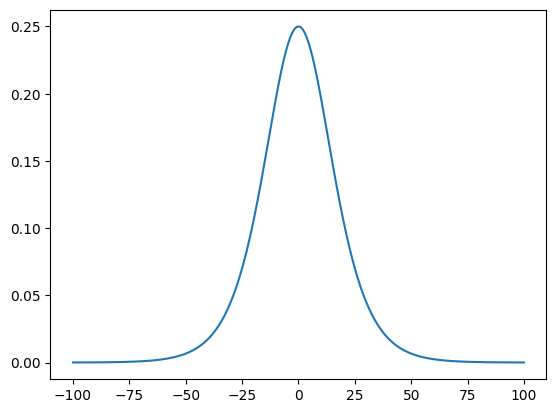

In [14]:
def deriv_sigmoid(x, alpha=0.1):
    return sigmoid(x, alpha) * (1 - sigmoid(x, alpha))

pdf = np.zeros_like(segment)
for i in range(len(segment)):
    pdf[i] = deriv_sigmoid(segment[i])

plt.plot(segment, pdf)

Для того, чтобы по плотности вероятности $f(x)$ вычислить вероятность того, что случайная величина примет значение, лежащее на отрезке $[a, b]$, нужно проинтегрировать плотность вероятности в прделах от $a$ до $b$:
$$
p(a \leq X \leq b) = \int_a^b f(x) dx
$$
Так как функция распределения $F(x)$ является первообразной плотности вероятности, то
$$
\int_a^b f(x) dx = F(b) - F(a)
$$
Что соответствует описанной выше формуле для функции вероятности.

### Математическое ожидание

**Математическое ожидание** (*expected value*) – это среднее значение случайной величины, которое показывает, какой результат в среднем можно ожидать от повторения эксперимента много раз.

$$ \mathrm E[X]=\sum_{i=1}^n x_1p_1$$
для непрерывного распределения
$$ \mathrm E[X] = \int\limits_{-\infty}^\infty xf(x)$$
где $f(x)$ - функция плотности распределения

In [ ]:
def EV(X, p):
    """Математическое ожидание"""
    return sum(X*p)
EV(X, p)

4.11

Если распределение вероятностей случайной величины неизвестно, математическое ожидание можно получить из результатов большого количества испытаний как среднее значение всех исходов (*sample mean*):
$$ \overline x = \frac{1}{n} \sum_{i=1}^n x_i $$

In [ ]:
# сгенерируем множество исходов заданной случайной величины
samples = np.random.choice(X, size=1000000, p=p)
samples.mean()

4.111806

### Отклонение случайной величины
**Отклонение** (*deviation*) случайной величины представляет собой рзность случайной величины и его математического ожидания:
$$ X - \mathrm E[X] $$
Вероятность отклонения $ x_i - \mathrm E[X]$ равно вероятности $p_i$ значения $x_i$.

Математическое ожидание отклонения равно нулю, так как отклонения в положительную сторону компенсируются отклонениями в отрицательную сторону (их значения отрицательны).

In [ ]:
deviations = X-EV(X, p)
print(deviations)
EV(deviations, p)   # Математическое ожидание отклонения равно нулю

[-4.11 -3.11 -2.11 -1.11 -0.11  0.89  1.89  2.89  3.89]


-4.440892098500626e-16

### Дисперсия
**Дисперсией** (*Variance*) дискретной случайной величины называется математическое ожидание *квадрата* отклонения случайной величины от ее математического ожидания:
$$ \mathrm{Var}(X) = \mathrm E[(X - \mathrm E[X])^2] = \sum {(x_i - \mathrm E[X])^2p_i} $$

In [ ]:
from statistics import variance
from numpy import power

def var(X, p):
    ev = EV(X, p)
    variance = 0
    for i in range(len(X)):
        variance += ((X[i] - ev) ** 2) * p[i]
    return variance

var(X, p)

4.9979000000000005

### Выборочная дисперсия

**Выборочная дисперсия** (*Sample Variance*) - дисперсия, оцениваемая эмпирически на основе данных выборки
$$ \tilde S_X^2 = \frac{1}{n} \sum_{i=1}^n (x_i - \overline x)^2 $$

**Несмещённая** (*unbiased*) выборочная дисперсия:
$$ S_X^2 = \frac{1}{n-1} \sum_{i=1}^n (x_i - \overline x)^2 $$
Деление на $n-1$ вместо $n$ дает чуть более высокую оценку $ S_X^2 = \frac{n}{n-1} \tilde S_X^2$. При больших $n$ несмещенная дисперсия дает лучшую оценку, чем смещенная.

In [ ]:
def var(samples):
    ev = samples.mean()
    variance = 0
    for s in samples:
        variance += (s - ev) ** 2

    return variance / len(samples)

var(samples)

4.993393418377746

In [ ]:
np.var(samples)     # два вариана вычисления
samples.var()       # дисперсии с numpy

4.993393418363999

### Стандартное отклонение
**Стандартное отклонение** (*standard deviation*) или **среднеквадратическое отклонение**  – это мера того, насколько значения случайной величины разбросаны относительно её среднего значения. Стандартное отклонение вычисляется как квадратный корень от дисперсии:
$$
\sigma_X = \sqrt{\mathrm{Var}(X)}
$$

In [ ]:
np.std(samples)     # два вариана вычисления
samples.std()       # среднеквадратического отклонения c numpy

2.2345902126260193

### Мода, Медиана
**Модой** (*Mode*) случайной величины называется ее наиболее вероятное значение.

**Медианой** (*Median*)случайной величины называется такое значение, для которого вероятность получить большее значение равно вероятности получить меньшее значение ($0.5$). Если случайная величина является непрерывной, то медиана может быть представлена уравнением:
$$
\int_{- \infty}^m f(x)dx = 0.5
$$
Где $f(x)$ – *плотность вероятности распределения* случайной величнины (*probabity density function* - PDF)


## Ковариация (корреляционный момент) (covariance)

Ковариация является мерой зависимости двух случайных величин. Для двух случайных величин, определенных на одном и том же вероятностном пространстве ковариация определяется следующим образом:
$$ \mathrm{cov}(X,Y) = \mathrm E[(X - \mathrm E(X))(Y - \mathrm E(Y))] $$
где $\mathrm E$ - математическое ожидание.


Создадим для начала две случайные величины, которые будут коррелировать, в виде наборов исходов испытаний.

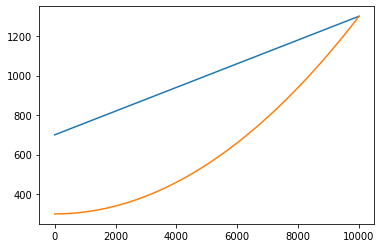

In [ ]:
# для начала зададим значения X и Y функциями:
sample_size = 10000

X = np.empty(sample_size)
Y = np.empty(sample_size)
for i in range(sample_size):
    x = i / 100
    X[i] = 6 * x  + 700
    Y[i] = 0.1 * (x**2) + 300

plt.plot(X)
plt.plot(Y)
plt.show()

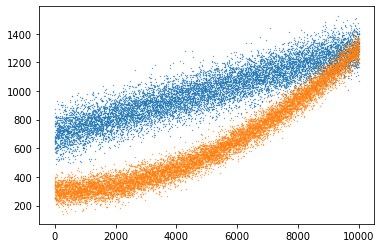

In [ ]:
# внесем шум
for i in range(len(X)):
    X[i] += np.random.normal(scale=80)
    Y[i] += np.random.normal(scale=50)

plt.scatter(range(10000), X, s=0.1)
plt.scatter(range(10000), Y, s=0.1)

Text(0, 0.5, 'Y')

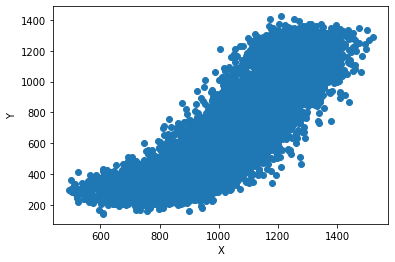

In [ ]:
# перетосуем массивы X и Y единым образом:
from sklearn import utils

X, Y = utils.shuffle(X, Y)
plt.scatter(X, Y)
plt.xlabel("X")
plt.ylabel("Y")

На диаграмме можно заметить, что высокми значениям X соответствуют преимущественно высокие значения Y, что говорит по положительной корреяции этих случайных величин.<br>

#### Выборочная ковариация

Ковариация, оцениваемая эмпирически на основе данных выборки
$$ \sigma_{XY} = \mathrm{cov}(X,Y) = \frac{1}{n} \sum_{i=1}^n (x_i - \overline x)(y_i - \overline y) = \frac{1}{n} \sum_{i=1}^n x_i \space y_i - \overline x \space \overline y$$
Заметим, что ковариация случайной величины между собой есть дисперсия:
$$ \mathrm{cov}(X,X) = \frac{1}{n} \sum_{i=1}^n (x_i - \overline x)^2 = \sigma_X^2 = \sigma_{XX}$$
По аналогии с исправленной дисперсией, можно рассматривать исправленную ковариацию, где вместо множителя $(1/n)$ используется $\frac{1}{n-1}$

In [ ]:
def cov(X, Y):
    return sum((X - X.mean()) * (Y - Y.mean())) / len(X)

print(f"{cov(X, Y) = }     ковариация между X и Y ")
print(f"{cov(Y, X) = }     ковариация между Y и X ")
print(f"{var(X)    = }     дисперсия X ")
print(f"{var(Y)    = }     дисперсия Y ")

np.cov(X, Y)

cov(X, Y) = 49796.64796452851     ковариация между X и Y 
cov(Y, X) = 49796.64796452851     ковариация между Y и X 
var(X)    = 36593.47638297169     дисперсия X 
var(Y)    = 90675.6698321705     дисперсия Y 


array([[36597.13609658, 49801.62812734],
       [49801.62812734, 90684.738306  ]])

#### Коэффициент корреляции
По абсолютному значению ковариации нельзя судить о том, насколько сильно величины взаимосвязаны, так как масштаб ковариации зависит от их дисперсий. Значение ковариации можно нормировать, поделив её на произведение среднеквадратических отклонений случайных величин. Полученная величина называется коэффициентом корреляции Пирсона (Pearson correlation coefficient (PCC))
$$ \mathbf r_{XY} = \frac {\sigma_{XY}}{\sigma_X \sigma_Y} $$
Коэффициент корреляции находится в интервале от -1 до 1. Две случайные величины являются коррелированнями, если $\sigma_{XY}$ или $\mathbf r_{XY}$ отличны от нуля. При $\mathbf r_{XY} > 0$ имеет место положительная корреляция, а при $\mathbf r_{XY} < 0$ - отрицательная корреляция.

In [ ]:
def r(X, Y):
    sigma_XY = cov(X, Y)
    sigma_X = np.sqrt(var(X))
    sigma_Y = np.sqrt(var(Y))
    return sigma_XY / (sigma_X * sigma_Y)

print(f"{r(X, Y) = }")
print(f"{r(Y, X) = }")
print(f"{r(X, X) = }")
print(f"{r(Y, Y) = }")
np.corrcoef(X, Y)

r(X, Y) = 0.8644758960936819
r(Y, X) = 0.8644758960936819
r(X, X) = 1.0000000000000002
r(Y, Y) = 1.0


array([[1.       , 0.8644759],
       [0.8644759, 1.       ]])

### Ковариационная матрица

При представлении данных буквой $\mathbf X$ обычно обозначают матрицу $ n \times d $ строки которй представляют $n$ объектов, описываемые $d$ признаками. $\mathbf x_r$ обозначает $r$-ую строку $\mathbf X$, $\mathbf x_c$ - $c$-ую колонку, а $x_{rc}$ - элемент на пересечении $r$-ой строки и $c$-ой колонки. Каждую колонку этой матрицы можно рассматривать как набор исходов случайной величины.

In [ ]:
X = np.array([  [2., 3.2, 5.1],
                [4., 3.3, 5.3],
                [2., 3.1, 5.4],
                [4., 3.1, 5.3],
                [6., 3.0, 5.6],
                [8., 3.1, 5.7]    ])

n, d = X.shape

Среднее по $j$-му столбцу (эмпирическая оценка математического ожидания) определяется формулой
$$\mu_j = \frac{1}{n} \sum_{i=1}^n \mathbf x_{ij}$$
$\mu^{\mathrm T}$ обозначает вектор-строку, содержащий средние по всем столбцам. Если $\mathbf 1$ - $n$-мерный вектор, содержащий только единицы, то $\mathbf 1 \mu^{\mathrm T}$ - матрица размерности $n \times d$, строками которой являются векторы $\mu^{\mathrm T}$.

In [ ]:
mu_T = np.average(X, axis=0).reshape(1, 3)  # вектор-строка
print(f"{mu_T = }")
ones = np.ones(shape=(n,1))                 # вектор-столбец
print('shapes', ones.shape, mu_T.shape)
averages = np.matmul(ones, mu_T)
print(averages)

mu_T = array([[4.33333333, 3.13333333, 5.4       ]])
shapes (6, 1) (1, 3)
[[4.33333333 3.13333333 5.4       ]
 [4.33333333 3.13333333 5.4       ]
 [4.33333333 3.13333333 5.4       ]
 [4.33333333 3.13333333 5.4       ]
 [4.33333333 3.13333333 5.4       ]
 [4.33333333 3.13333333 5.4       ]]


Центрированная матрица (zero-centred) $ \mathbf X' = \mathbf X - \mathbf 1 \mu^{\mathrm T} $

In [ ]:
X_centered = X - averages
print(X_centered)

[[-2.33333333e+00  6.66666667e-02 -3.00000000e-01]
 [-3.33333333e-01  1.66666667e-01 -1.00000000e-01]
 [-2.33333333e+00 -3.33333333e-02  8.88178420e-16]
 [-3.33333333e-01 -3.33333333e-02 -1.00000000e-01]
 [ 1.66666667e+00 -1.33333333e-01  2.00000000e-01]
 [ 3.66666667e+00 -3.33333333e-02  3.00000000e-01]]


Матрицей разброса (scatter matrix) называется матрица $\mathbf S$ размерности $d \times d$
$$ \mathbf S = \mathbf X'^{\mathrm T} \mathbf X'= \mathbf X^{\mathrm T} \mathbf X - n \mathbf M $$
где $ \mathbf M = \mu \mu^{\mathrm T} $ - матрица $d \times d$ элементами которой являютсяпроизведения средних по столбцам $ m_{ij} = \mu_j \mu_c $.

In [ ]:
mu = mu_T.transpose()
M = np.matmul(mu, mu_T)
print(M)

[[18.77777778 13.57777778 23.4       ]
 [13.57777778  9.81777778 16.92      ]
 [23.4        16.92       29.16      ]]


In [ ]:
S = np.matmul(X_centered.transpose(), X_centered)
print(S)
S_alt = np.matmul(X.transpose(), X) - n * M
print(S_alt)

[[27.33333333 -0.46666667  2.2       ]
 [-0.46666667  0.05333333 -0.07      ]
 [ 2.2        -0.07        0.24      ]]
[[27.33333333 -0.46666667  2.2       ]
 [-0.46666667  0.05333333 -0.07      ]
 [ 2.2        -0.07        0.24      ]]


In [ ]:
# заметим, что несмотря на визуальное равенство матриц
# S и S_alt сревнение матриц дает False:
print(S == S_alt)
print(np.array_equal(S, S_alt))

[[False False False]
 [False False False]
 [False False False]]
False


In [ ]:
# это происходит в силу ошибок округления элементов типа float
# адекватное сравнение можно произвести функциями isclose и allclose:
print(np.isclose(S, S_alt))
print(np.allclose(S, S_alt))
# функцию isclose можно использовать для сравнения чисел float

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]
True


Ковариационной матрицей матрицы $\mathbf X$ называется матрица $ \mathbf \Sigma = \frac{1}{n} \mathbf S $, элементами которой являются попарные ковариации между колонками матрицы $\mathbf X $:
$$ \sigma_{jc} = \mathrm{cov}(\mathbf x_j, \mathbf x_c) = \frac{1}{n} \sum_{i=1}^n(\mathbf X_{ij} - \mu_j)(\mathbf X_{ic} - \mu_c) = \frac{1}{n} \left( \sum_{i=1}^n \mathbf X_{ij} \mathbf X{ic} - \mu_i \mu_c \right) $$
$\sigma_{jc}$ - ковариация между колонками $j$ и $c$.<br>
$\sigma_{jj}$ - дисперсия $j$-й колонки:
$$ \sigma_{jj} = \sigma_{j}^2 = \frac{1}{n} \sum_{i=1}^n(\mathbf X_{ij} - \mu_j)^2 = \frac{1}{n} \left( \sum_{i=1}^n \mathbf X_{ij}^2 - \mu_i \right) $$

In [ ]:
cov_12 = (1/n) * np.sum((X[:, 1] - mu[1]) * (X[:, 2] - mu[2]))
print(cov_12)       # ковариация между колонками 1 и 2

-0.011666666666666672


In [ ]:
cov_matrix = np.empty(shape=(d, d))
for i in range(d):
    for j in range(d):
        cov_matrix[i, j] = cov(X[:, i], X[:, j])

cov_matrix

array([[ 4.55555556, -0.07777778,  0.36666667],
       [-0.07777778,  0.00888889, -0.01166667],
       [ 0.36666667, -0.01166667,  0.04      ]])

в отличие от нашей функции `cov` функция `cov` из numpy вычисляет исправленные ковариации, где вместо множителя $(1/n)$ используется $\frac{1}{n-1}$

In [ ]:
np.cov(X.transpose())

array([[ 5.46666667, -0.09333333,  0.44      ],
       [-0.09333333,  0.01066667, -0.014     ],
       [ 0.44      , -0.014     ,  0.048     ]])

Ковариационная матрица является симметричной, и на пересечении $i$, $j$ этой матрицы располагаются ковариация между колонками $i$ и $j$ матрицы $\mathbf X$.